In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.cluster import KMeans# implements the K-Means algorithm for clustering.
from sklearn import metrics

In [31]:
dji = pd.read_csv('./dow_jones_index.data', sep=',')
dji.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [32]:
dji.drop(columns=['percent_change_price', 'percent_change_volume_over_last_wk', 'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close', 'percent_change_next_weeks_price', 'days_to_next_dividend', 'percent_return_next_dividend'], inplace=True)
dji.head()

,quarter,stock,date,open,high,low,close,volume
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761


In [33]:
def corrigir_campo_valor(valor):
    valor = valor.replace('$', '')
    return float(valor)

In [34]:
def corrigir_data(data):
    data = data[:1]
    return data

In [35]:
dji['open'] = dji['open'].apply(corrigir_campo_valor)
dji['high'] = dji['high'].apply(corrigir_campo_valor)
dji['low'] = dji['low'].apply(corrigir_campo_valor)
dji['close'] = dji['close'].apply(corrigir_campo_valor)
dji['date'] = dji['date'].apply(corrigir_data)

In [36]:
dji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   quarter  750 non-null    int64  
 1   stock    750 non-null    object 
 2   date     750 non-null    object 
 3   open     750 non-null    float64
 4   high     750 non-null    float64
 5   low      750 non-null    float64
 6   close    750 non-null    float64
 7   volume   750 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 47.0+ KB


In [37]:
dji = dji.sort_values(by='date')

In [38]:
mes = '6'
df_mes = dji[dji['date'] == mes]

In [39]:
train_x = df_mes[['close', 'volume']]

train_x

,close,volume
683,30.77,114504788
528,165.07,22984546
684,30.44,116043866
475,38.04,54513950
697,56.68,20959450
...,...,...
554,65.06,56535090
553,66.29,58201928
655,20.84,169014117
397,74.16,25381159


In [40]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(train_x)
x_clustered = kmeans.predict(train_x)

In [41]:
new_data = [[41.37, 6547812]]
y_pred = kmeans.predict(new_data)
y_pred

array([1])

In [42]:
cluster_0_temp = []
cluster_1_temp = []
cluster_2_temp = []

In [43]:
for i in range(x_clustered.shape[0]):
  if x_clustered[i] == 0:
    cluster_0_temp.append([df_mes.iloc[i]['stock'], df_mes.iloc[i]['volume']])
  elif x_clustered[i] == 1:
    cluster_1_temp.append([df_mes.iloc[i]['stock'], df_mes.iloc[i]['volume']])
  elif x_clustered[i] == 2:
    cluster_2_temp.append([df_mes.iloc[i]['stock'], df_mes.iloc[i]['volume']])

In [44]:
cluster_0 = pd.DataFrame(cluster_0_temp,columns=['stock','volume'])
cluster_1 = pd.DataFrame(cluster_1_temp,columns=['stock','volume'])
cluster_2 = pd.DataFrame(cluster_2_temp,columns=['stock','volume'])

In [45]:
plt.rcParams['figure.figsize'] = [15, 15]

Text(0, 0.5, 'volume')

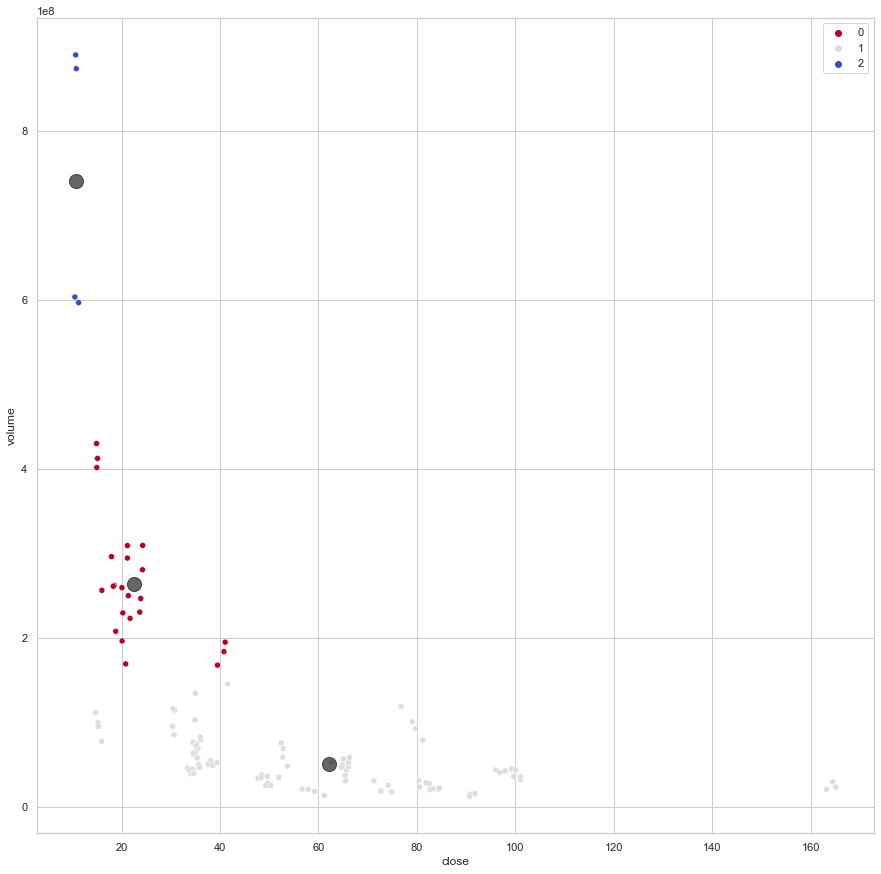

In [46]:
sns.scatterplot(data=df_mes, x='close', y='volume', hue=x_clustered, palette='coolwarm_r')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.6)
plt.xlabel('close')
plt.ylabel('volume')

,stock,volume
0,INTC,249719951
1,INTC,222978209
2,INTC,309031457
3,JPM,194764785
4,JPM,183560880
5,JPM,167589521
6,GE,261979707
7,GE,295978977
8,CSCO,429730443
9,CSCO,401380782


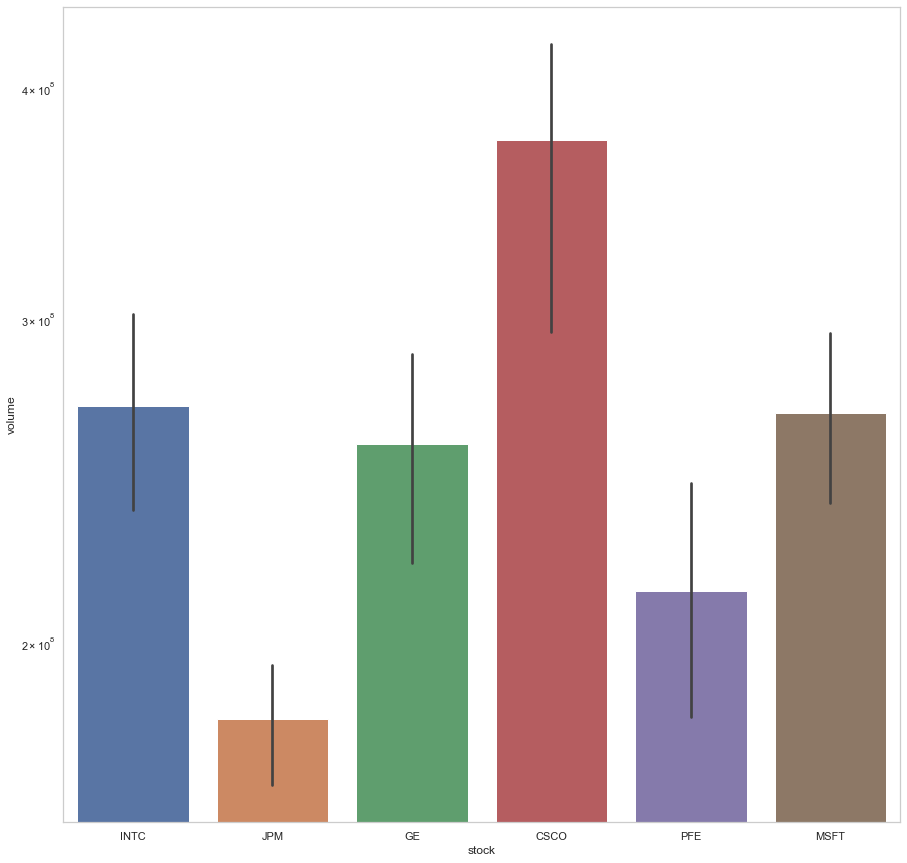

In [47]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="stock", y="volume", data=cluster_0, log=True)
cluster_0

,stock,volume
0,T,114504788
1,IBM,22984546
2,T,116043866
3,DIS,54513950
4,TRV,20959450
...,...,...
88,BA,17813730
89,JNJ,56535090
90,JNJ,58201928
91,BA,25381159


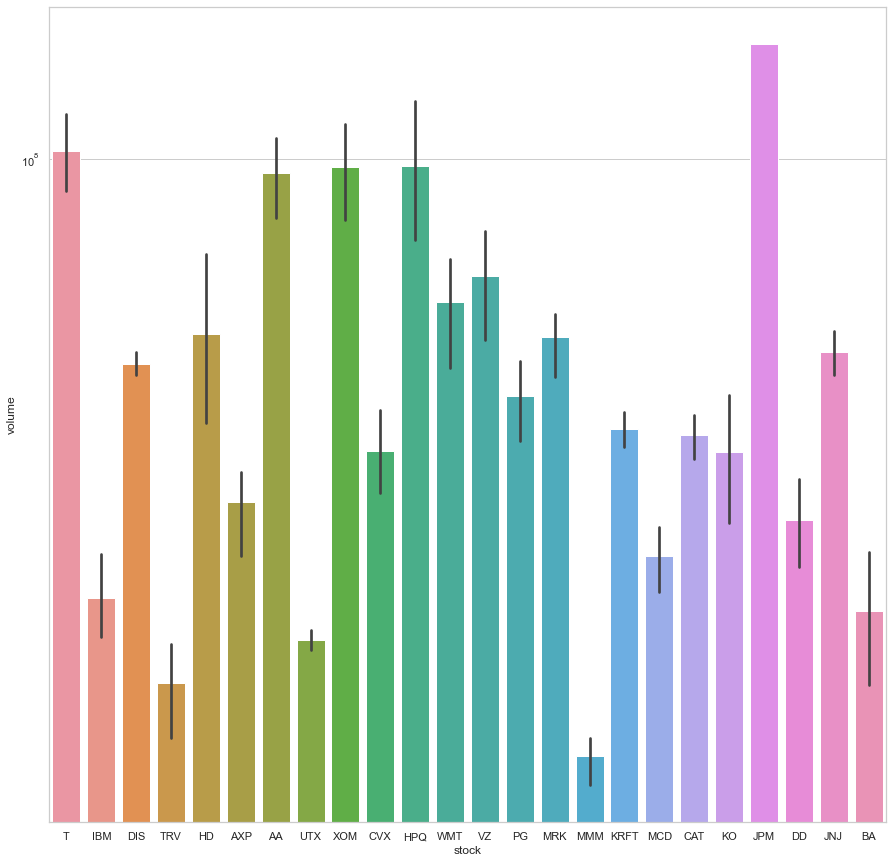

In [48]:

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="stock", y="volume", data=cluster_1, log=True)
cluster_1


,stock,volume
0,BAC,596420503
1,BAC,873241317
2,BAC,889460755
3,BAC,603098073


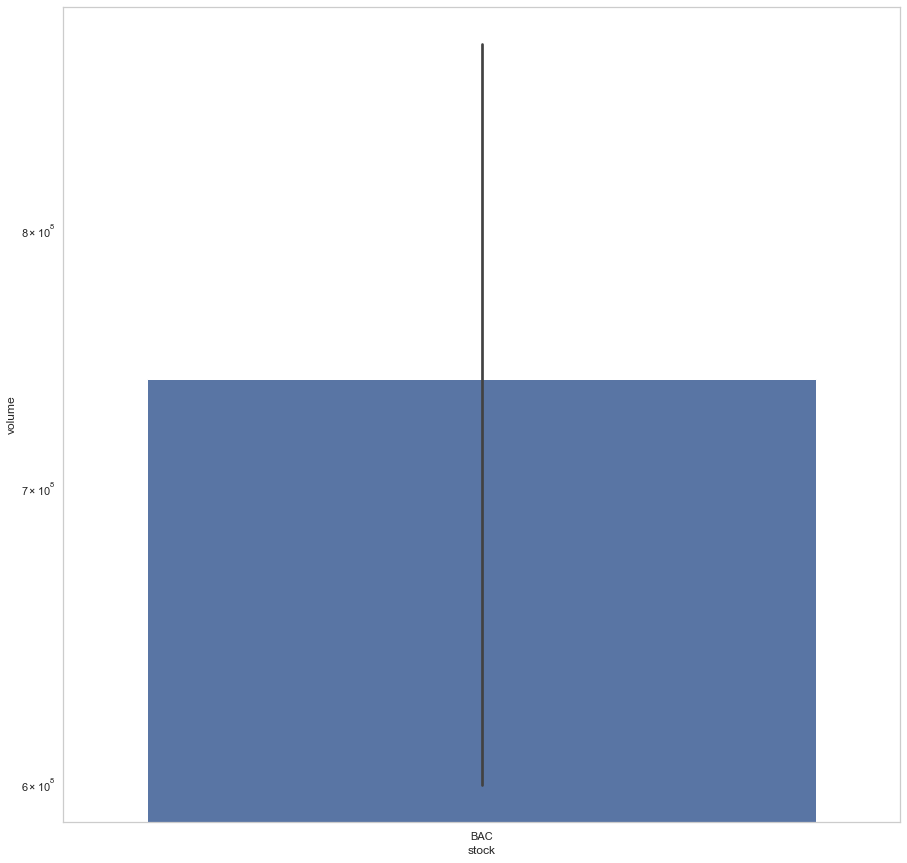

In [49]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="stock", y="volume", data=cluster_2, log=True)
cluster_2